In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from neural_exploration import *
sns.set()

### Bandit settings

In [2]:
T = 250
n_arms = 12 # a -> 숫자를 키워볼 것
n_features = 20 # d -> 숫자를 키워볼 것
n_assortment = 4
noise_std = 0.01 # noise of reward 0.01*N(0,1)

n_samples = 1 # number of samples for each round and arm, only for TS

n_sim = 2 # number of simulations

def F(x): # round_reward_function
    if len(np.shape(x)) == 1: # if x is a vector
        return np.sum(x)
    else: # if x is a matrix
        return np.sum(x, axis=1)                

### Parameter settings

In [3]:
reg_factor = 1.0 # lambda
delta = 0.1 # delta
exploration_variance = 1.0 # nu, only for TS
confidence_scaling_factor = 1.0 # gamma, only for UCB

### Neural network settings

In [4]:
p = 0.0 # dropout probability
hidden_size = 64 # m
epochs = 100 # 
train_every = 10
confidence_scaling_factor = 1.0
use_cuda = False

### NeuralUCB on linear rewards

In [5]:
### mean reward function
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: 1*np.dot(a, x)

In [8]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std, \
                          n_assortment=n_assortment, n_samples=n_samples, round_reward_function=F)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = NeuralUCB(bandit,
                      hidden_size=hidden_size,
                      reg_factor=reg_factor,
                      delta=delta,
                      confidence_scaling_factor=confidence_scaling_factor,
                      # exploration_variance=exploration_variance,
                      training_window=100,
                      p=p,
                      learning_rate=0.01,
                      epochs=epochs,
                      train_every=train_every,
                      use_cuda=use_cuda
                     )
    
    model.set_init_param(model.model.parameters())
    
    model.run()
    regrets[i] = np.cumsum(model.regrets)

100%|██████████| 250/250 [00:28<00:00,  8.72it/s, total regret=17, % optimal super arm=48.00%]  


### Sublinear regret growth : the bandit problem is solved efficiently

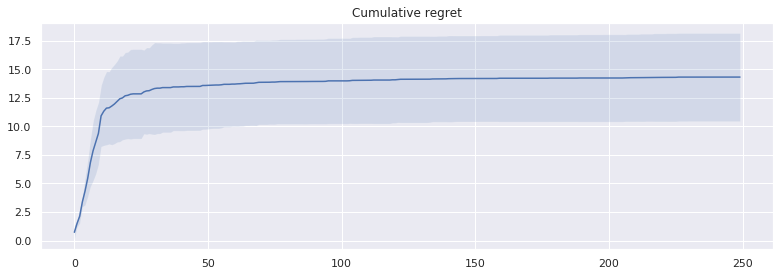

In [9]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(t, mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
    
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

fig.savefig('neural_ucb_linear.pdf')

### NeuralUCB on quadratic rewards

In [26]:
### mean reward function
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: 1*np.dot(a, x)**2

In [31]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std, \
                          n_assortment=n_assortment, n_samples=n_samples, round_reward_function=F)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = NeuralUCB(bandit,
                      hidden_size=hidden_size,
                      reg_factor=reg_factor,
                      delta=delta,
                      confidence_scaling_factor=confidence_scaling_factor,
                      # exploration_variance=exploration_variance,
                      training_window=100,
                      p=p,
                      learning_rate=0.01,
                      epochs=epochs,
                      train_every=train_every,
                      use_cuda=use_cuda,
                     )
    
    model.set_init_param(model.model.parameters())
    
    model.run()
    regrets[i] = np.cumsum(model.regrets)

  7%|▋         | 134/2000 [00:08<01:59, 15.61it/s, total regret=844, % optimal super arm=58.96%]


KeyboardInterrupt: 

### Sublinear regret growth : the bandit problem is solved efficiently (even though the reward is nonlinear!)

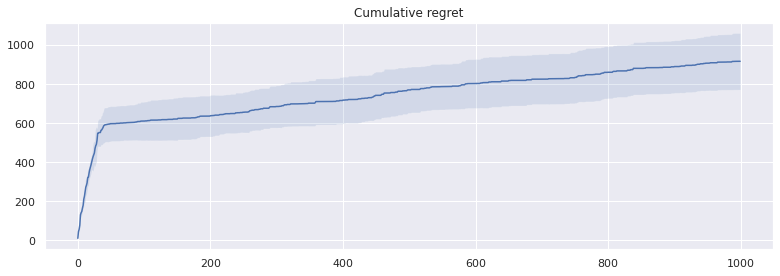

In [21]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(t, mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
    
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

fig.savefig('neural_ucb_quad.pdf')

### NeuralUCB on nonlinear rewards

In [15]:
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: 1*np.cos(np.pi*np.dot(x, a))

In [16]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std, \
                          n_assortment=n_assortment, n_samples=n_samples, round_reward_function=F)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = NeuralUCB(bandit,
                      hidden_size=hidden_size,
                      reg_factor=reg_factor,
                      delta=delta,
                      confidence_scaling_factor=confidence_scaling_factor,
                      # exploration_variance=exploration_variance,
                      training_window=100,
                      p=p,
                      learning_rate=0.01,
                      epochs=epochs,
                      train_every=train_every,
                      use_cuda=use_cuda,
                     )
    
    model.set_init_param(model.model.parameters())
    
    model.run()
    regrets[i] = np.cumsum(model.regrets)

 31%|███▏      | 3147/10000 [07:21<16:02,  7.12it/s, total regret=4.33e+3, % optimal super arm=34.22%]  


KeyboardInterrupt: 

### Sublinear regret growth : the bandit problem is solved efficiently (even though the reward is nonlinear!)

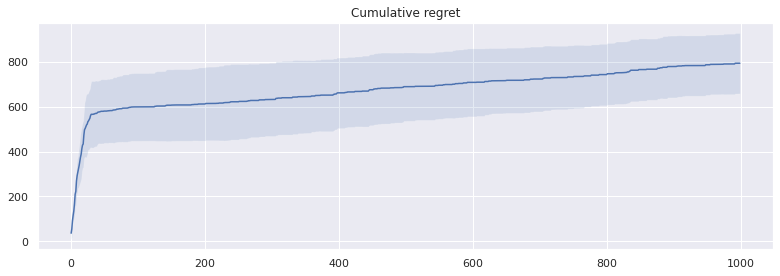

In [24]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(t, mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
    
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

fig.savefig('neural_ucb_cosine.pdf')